In [7]:
import os
from PIL import Image
import torch

from diffusion.controlnet import ControlNetModel
from diffusion.pipeline_controlnet import StableDiffusionControlNetPipeline
from diffusers import UniPCMultistepScheduler
from diffusers.utils import load_image

device = "cuda:0"

### Set model paths

In [8]:
base_model_path = "runwayml/stable-diffusion-v1-5"      # NOTE: set as the base Stable Diffusion model
controlnet_path = "./runs/controlnet_fill50k"           # NOTE: set as the output directory of your ControlNet training

### Load models and scheduler

In [ ]:
# Load ControlNet
controlnet = ControlNetModel.from_pretrained(
    controlnet_path, 
    torch_dtype=torch.float16
)
# Load Stable Diffusion with ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, 
    controlnet=controlnet, 
    torch_dtype=torch.float16,
    safety_checker=None,
)
# Set scheduler
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Load model to GPU
pipe.to(device)

### Load condition for ControlNet

Prompt: pale golden rod circle with old lace background


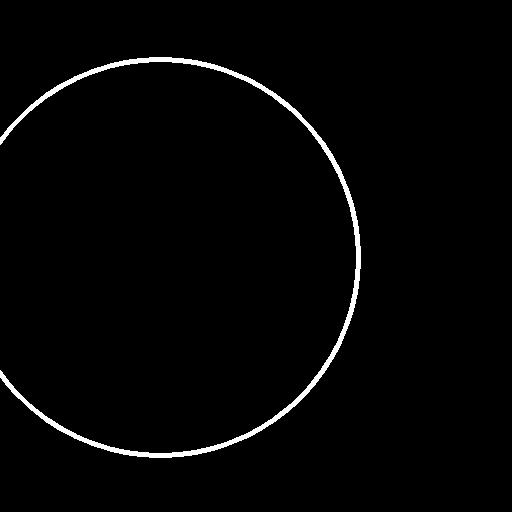

In [24]:
control_image = load_image("./data/conditioning_image_1.png")
prompt = "pale golden rod circle with old lace background"

print(f"Prompt: {prompt}")
control_image

100%|██████████| 20/20 [00:01<00:00, 17.76it/s]


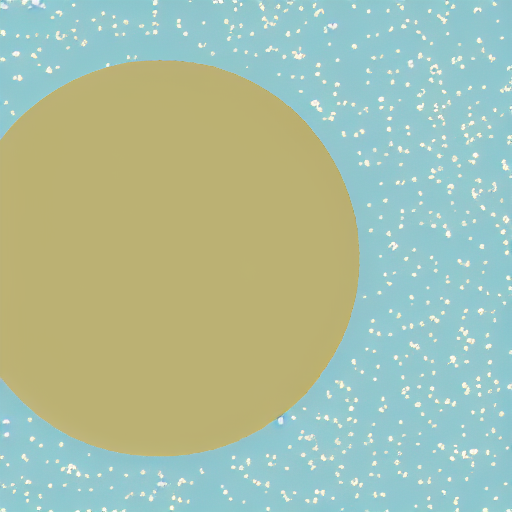

In [32]:
seed = 10
generator = torch.manual_seed(seed)

# Generate image
image = pipe(
    prompt, 
    num_inference_steps=20, 
    generator=generator, 
    image=control_image
).images[0]

image
# image.save("./output.png")